## Homework 1: Data Analysis on AirBnB dataset

**The reason I chose this dataset over the Global Temperatures Dataset is that the former involves more challenging data cleaning operations to prep the data before analyzing it.**

### Methodology

- Get a high level overview of the data
- Search and find all the problems in the dataset
- Clean and process the data
- Analyze and visualize the data

In [1]:
#Import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
df = pd.read_csv("Airbnb_Data.csv", low_memory = False)

In [3]:
df.head(5)

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

### Examine the structure of the data

In [4]:
r,c = df.shape
print('There are {} rows and {} columns in the NYC AirBnB dataset'.format(r,c))

There are 102599 rows and 26 columns in the NYC AirBnB dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Here we notice that column names are not named uniformly for instance some variables are named using the `snake_case` convention while the others are named with the `pascal` convention. Though, it may seem it is okay to proceed the data analysis with it, changing to the snake_case convention enables us to access the columns using the period (.) operator E.g. `dataframe.my_columns`

In [7]:
df.rename(columns = {'NAME':'name','host id':'host_id', 'host name':'host_name', 'neighbourhood group':'neighbourhood_group',
                     'country code':'country_code','room type':'room_type','Construction year':'construction_year', 
                     'minimum nights':'minimum_nights', 'number of reviews':'number_of_reviews','last review':'last_review',
                     'reviews per month':'reviews_per_month','service fee':'service_fee', 'review rate number':'review_rate_number',
                     'calculated host listings count':'calculated_host_listings_count','availability 365':'availability_365'},
          inplace = True)

**One odd feature is the existance of two id columns, specifically `id` and `host_id`, we will need to further inspect the data to clarify the difference between the two but one hypothesis is that there can be multiple entries for the same host if the host has more than one airbnb place or something along those lines while `id` stands for each unique entry or row**

In [8]:
df['host_id'].value_counts(ascending=True)

80014485718    1
14261296392    1
16562437483    1
54371568628    1
48720797159    1
              ..
3016524636     2
71002819580    2
68337898917    2
2500204289     2
11689016852    2
Name: host_id, Length: 102057, dtype: int64

In [9]:
df["id"].value_counts()

6044940     2
6067584     2
6077525     2
6076973     2
6076421     2
           ..
19804390    1
19803837    1
19803285    1
19802733    1
57367417    1
Name: id, Length: 102058, dtype: int64

**As we can there is not much we can conclude from the above analysis, which might be due to NULL or duplicated values, so let's truncate them all!**

In [10]:
#Finding the number of null entries in each column.
for i in df.columns:
    num = df[i].isnull().sum()
    if num != 0:
        print(i + " has {} null values.".format(num))
        print()

name has 250 null values.

host_identity_verified has 289 null values.

host_name has 406 null values.

neighbourhood_group has 29 null values.

neighbourhood has 16 null values.

lat has 8 null values.

long has 8 null values.

country has 532 null values.

country_code has 131 null values.

instant_bookable has 105 null values.

cancellation_policy has 76 null values.

construction_year has 214 null values.

price has 247 null values.

service_fee has 273 null values.

minimum_nights has 409 null values.

number_of_reviews has 183 null values.

last_review has 15893 null values.

reviews_per_month has 15879 null values.

review_rate_number has 326 null values.

calculated_host_listings_count has 319 null values.

availability_365 has 448 null values.

house_rules has 52131 null values.

license has 102597 null values.



**Let's have a thorough inspection of the missing values**

<AxesSubplot:>

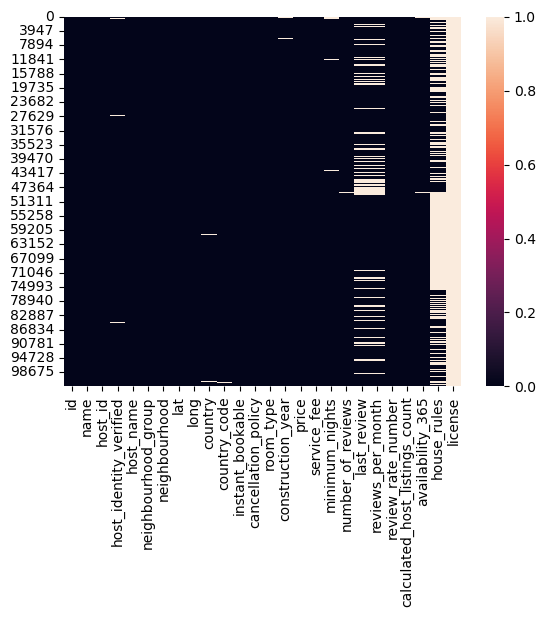

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [13]:
df.drop(['id','country', 'country_code', 'last_review', 'house_rules', 'license'], axis=1, inplace = True)

In [14]:
df.shape

(102599, 20)

The missing data in the `reviews_per_month` column is important so we cannot resort to removal, so instead we will impute the missing values with 0.

In [15]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

#examing changes
df.reviews_per_month.isnull().sum()

0

In [16]:
df.isnull().sum()

name                              250
host_id                             0
host_identity_verified            289
host_name                         406
neighbourhood_group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room_type                           0
construction_year                 214
price                             247
service_fee                       273
minimum_nights                    409
number_of_reviews                 183
reviews_per_month                   0
review_rate_number                326
calculated_host_listings_count    319
availability_365                  448
dtype: int64

In [17]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [18]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98979 entries, 0 to 102040
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            98979 non-null  object 
 1   host_id                         98979 non-null  int64  
 2   host_identity_verified          98979 non-null  object 
 3   host_name                       98979 non-null  object 
 4   neighbourhood_group             98979 non-null  object 
 5   neighbourhood                   98979 non-null  object 
 6   lat                             98979 non-null  float64
 7   long                            98979 non-null  float64
 8   instant_bookable                98979 non-null  object 
 9   cancellation_policy             98979 non-null  object 
 10  room_type                       98979 non-null  object 
 11  construction_year               98979 non-null  float64
 12  price                          

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

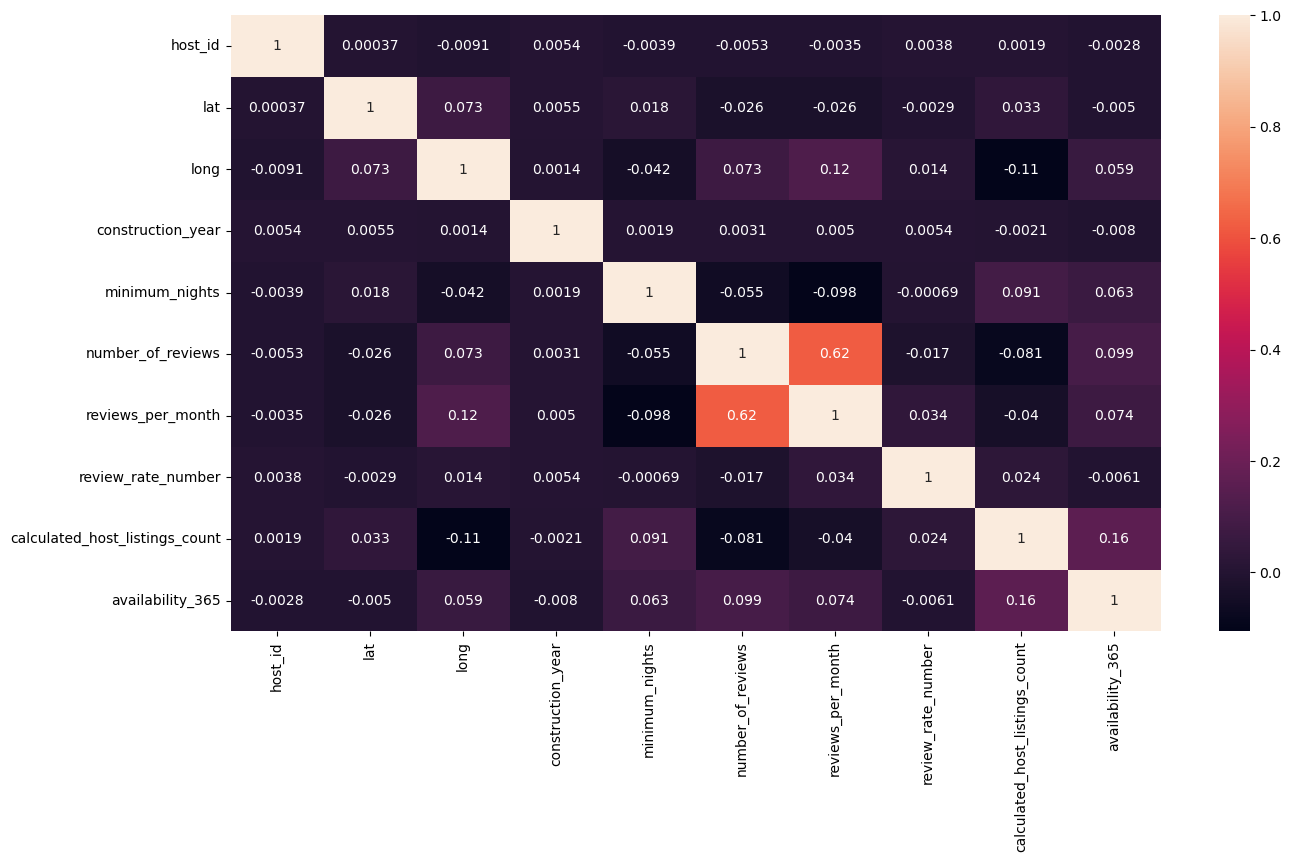

In [19]:
corr = df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

**We can see a lot of interesting features and relationships in this heatmap, such as `reviews_per_month` and `number_of_reviews`are correlated.**

In [20]:
df.shape

(98979, 20)

In [21]:
df.isnull().any()

name                              False
host_id                           False
host_identity_verified            False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
lat                               False
long                              False
instant_bookable                  False
cancellation_policy               False
room_type                         False
construction_year                 False
price                             False
service_fee                       False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
review_rate_number                False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [22]:
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(int)

### Question 1: In the data, there are two values of host_identity_verified. Which value is larger?

In [23]:
df.host_identity_verified.value_counts()

unconfirmed    49545
verified       49434
Name: host_identity_verified, dtype: int64

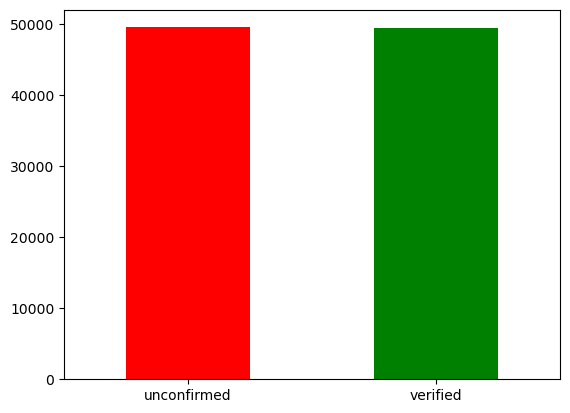

In [24]:
df.host_identity_verified.value_counts().plot(kind='bar',color=['r','g'], rot = 0)
plt.show()

### Type *Unconfimed* is larger

## Question 2. What are the top 2 neighbourhood_group?

In [25]:
print('Unique value for neighbourhood_group are :',df.neighbourhood_group.unique())

Unique value for neighbourhood_group are : ['Brooklyn' 'Manhattan' 'brookln' 'Queens' 'Bronx' 'Staten Island']


In [26]:
len(df.neighbourhood_group.unique())

6

**This indicates there are 6 neighborhood groups in NY, but there is only 5 in real**

In [27]:
df.neighbourhood_group.value_counts().head(2)

Manhattan    42234
Brooklyn     40389
Name: neighbourhood_group, dtype: int64

**One cell is wrongly spelled Brooklyn as brooklyn so we need to rectify it.**

In [28]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace('brookln','Brooklyn')

In [29]:
df.neighbourhood_group.value_counts().head(2)

Manhattan    42234
Brooklyn     40390
Name: neighbourhood_group, dtype: int64

In [30]:
fig = px.histogram(df,x='neighbourhood_group',color='neighbourhood_group',template='plotly_dark')
fig.show(renderer='notebook')

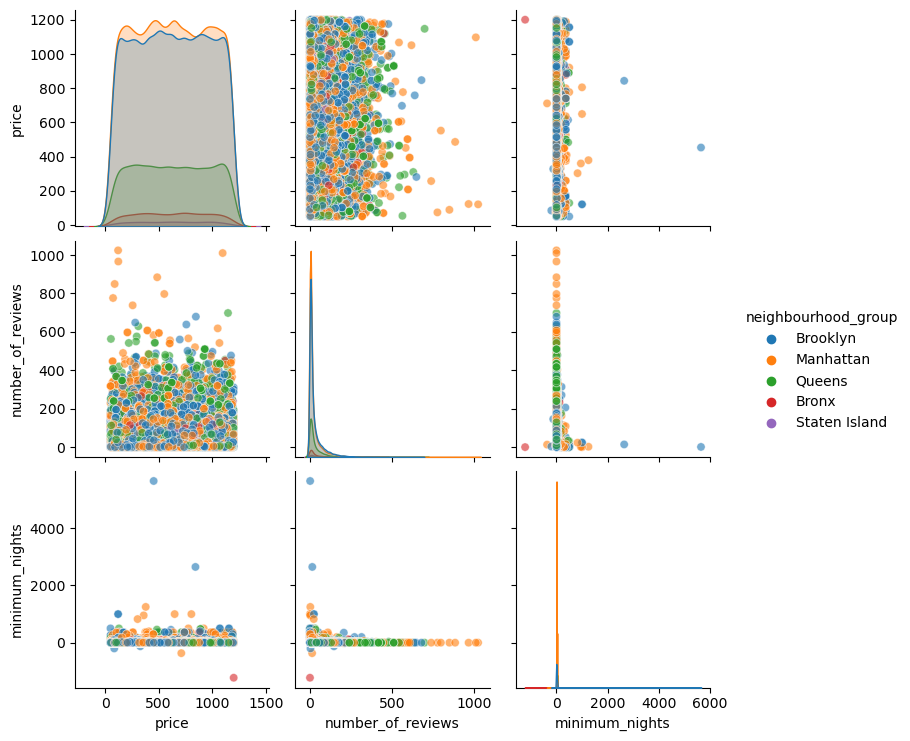

In [31]:
sns.pairplot(data=df,vars=['price','number_of_reviews','minimum_nights']
             ,hue='neighbourhood_group',plot_kws = {'alpha': 0.6})

**Some insights from the above pairplot:**

- lower the price, higher the number of reviews.
- lesser the number of nights, higher the price.

Let's do a linear regression to further explore the above analysis

In [32]:
from scipy.stats import linregress
linregress(df['price'], df['number_of_reviews'])

LinregressResult(slope=0.0007559287531989688, intercept=26.86333697011255, rvalue=0.005098067369181653, pvalue=0.10873841657531742, stderr=0.0004713054998850528, intercept_stderr=0.3336358795229189)

In [33]:
linregress(df['price'],df['minimum_nights'])

LinregressResult(slope=-0.0004074071087758276, intercept=8.311272688923559, rvalue=-0.0047577401220834205, pvalue=0.13444042132133238, stderr=0.00027217976068909613, intercept_stderr=0.19267531116864042)

In [34]:
linregress(df['number_of_reviews'],df['minimum_nights'])

LinregressResult(slope=-0.03169296280731418, intercept=8.922838677575546, rvalue=-0.054879513056030955, pvalue=6.841129159966396e-67, stderr=0.0018328649499903846, intercept_stderr=0.10311970351280836)

***Inference - since the p values are higher than 0.05, we fail to reject the null hypothesis that there is a relationship.***

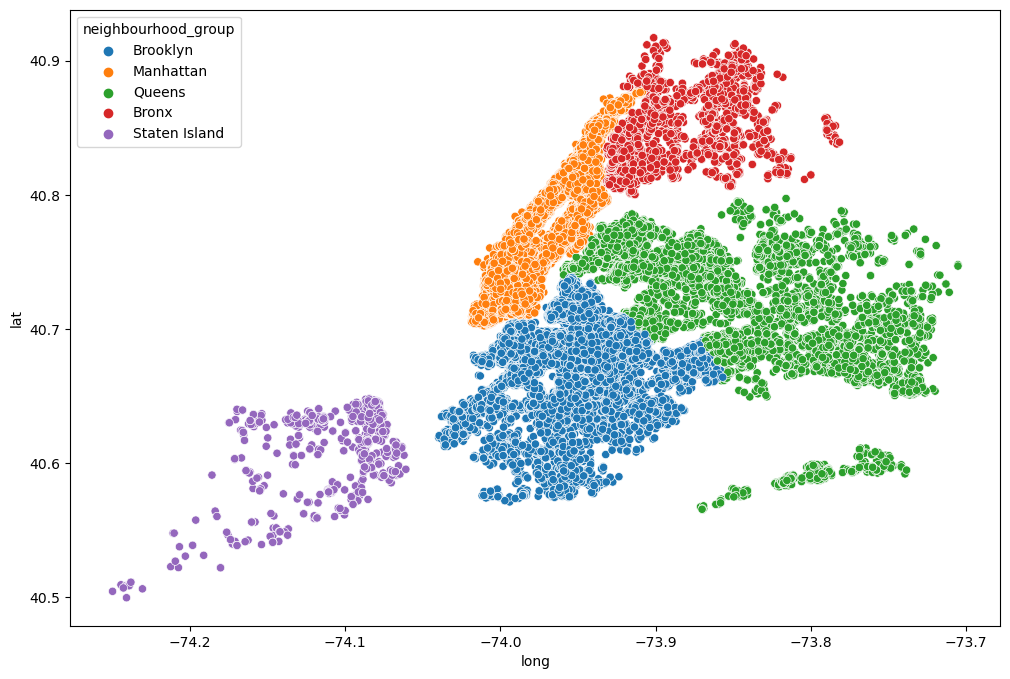

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.long,y=df.lat,hue=df['neighbourhood_group'])
plt.show()

Text(0.5, 1.0, 'Log-Price Distribution Plot')

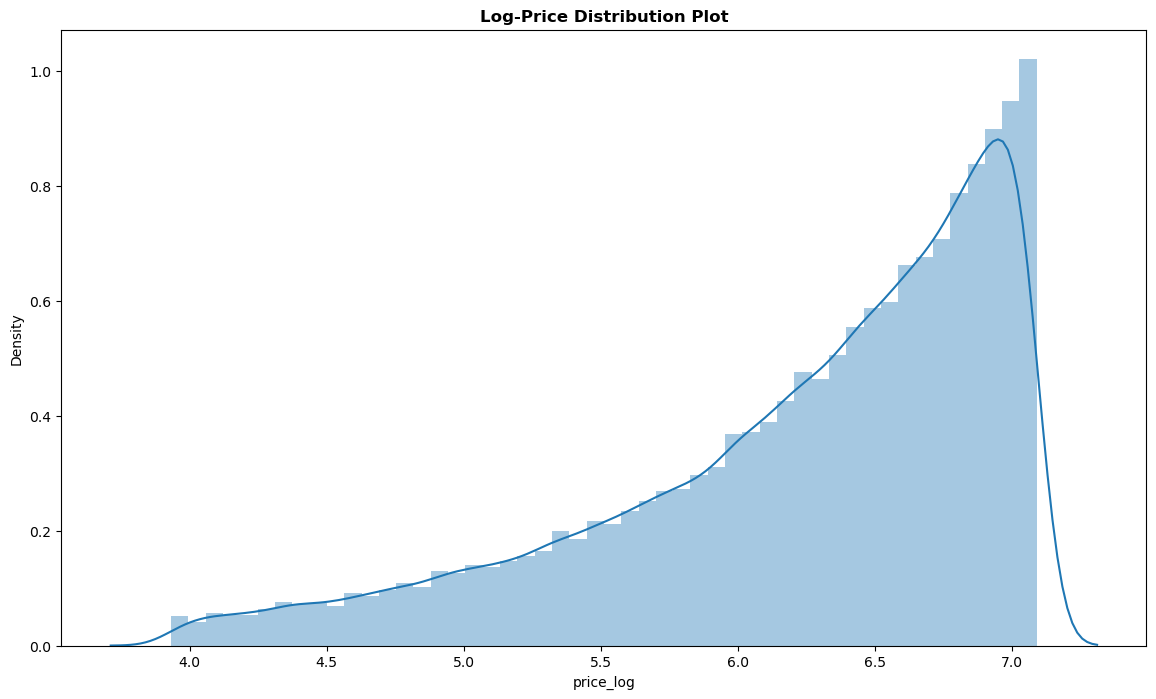

In [36]:
df['price_log'] = np.log(df.price+1)

plt.figure(figsize=(14,8))
sns.distplot(df['price_log'])
plt.title("Log-Price Distribution Plot",size=12, weight='bold')

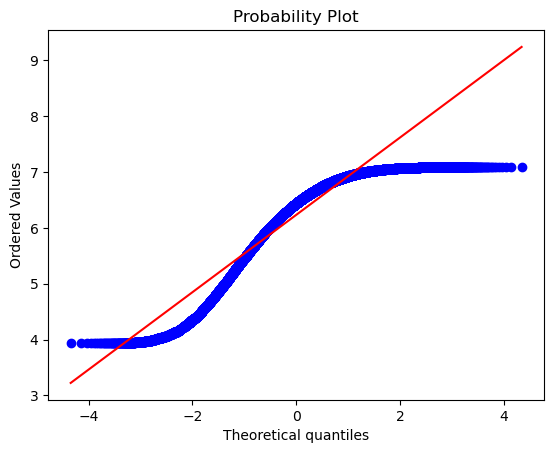

In [37]:
from scipy import stats
stats.probplot(df['price_log'], plot=plt)
plt.show()

**The above graph shows a poor goodness of it so we can't assume normality**

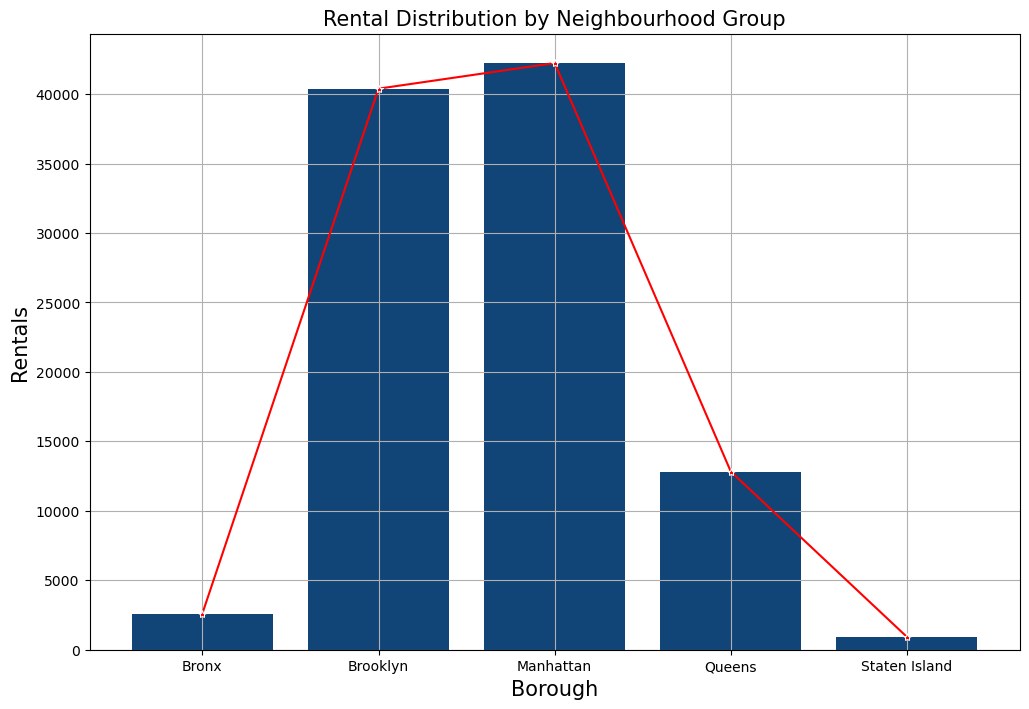

In [38]:
#Bar plot with neighbourhood distribution
neighbourhood = df.groupby('neighbourhood_group')['price'].count().reset_index()

fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=neighbourhood[neighbourhood.columns[0]],
y=neighbourhood[neighbourhood.columns[1]],color='#004488',ax=ax)
sns.lineplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='r',marker='*',ax=ax)
plt.ylabel('Rentals', fontsize='15')
plt.xlabel('Borough',fontsize='15')
plt.title('Rental Distribution by Neighbourhood Group',fontsize='15')
plt.grid('x')
plt.show()

## Question 3. How many room types are in the data, and what are their proportions?

In [39]:
print('Unique value for room_type are :',df['room_type'].unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [40]:
df['room_type'].value_counts()

Entire home/apt    51894
Private room       44831
Shared room         2143
Hotel room           111
Name: room_type, dtype: int64

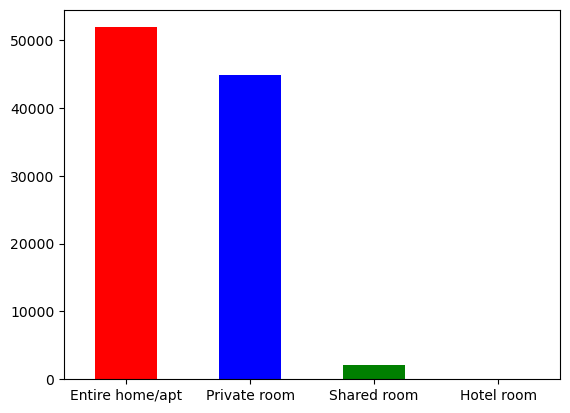

In [41]:
df['room_type'].value_counts().plot(kind='bar',color=['r','b','g'], rot = 0)
plt.show()

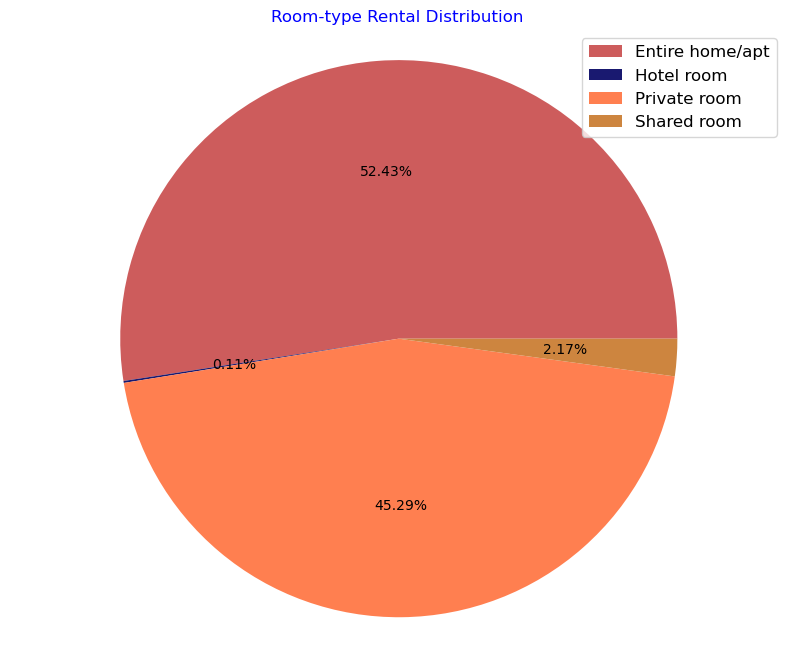

In [42]:
#Pie chart
room_type = df.groupby('room_type')['lat'].count().reset_index()
room_type.rename(columns={'lat':'n_rooms'},inplace=True)

plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['indianred', 'midnightblue','coral', 'peru'])
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize='12')
plt.title('Room-type Rental Distribution', fontsize='12',color='b')
plt.show()

## Regression Analysis

In [43]:
df_new = df.copy()

In [44]:
df_new.columns

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'price_log'],
      dtype='object')

In [45]:
df_new.service_fee

0         $193 
1          $28 
4          $41 
5         $115 
7         $212 
          ...  
102029    $164 
102030     $91 
102031    $216 
102032     $21 
102040    $196 
Name: service_fee, Length: 98979, dtype: object

In [46]:
df_new['service_fee'] = df_new['service_fee'].str.replace(',', '').str.replace('$', '').astype(int)

In [47]:
df_reg = df_new[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]

In [48]:
df_reg.head(10)

neighbourhood_group        room_type  price  minimum_nights  \
0             Brooklyn     Private room    966            10.0   
1            Manhattan  Entire home/apt    142            30.0   
4            Manhattan  Entire home/apt    204            10.0   
5            Manhattan  Entire home/apt    577             3.0   
7             Brooklyn     Private room   1060            45.0   
8            Manhattan     Private room   1018             2.0   
9            Manhattan     Private room    291             2.0   
10           Manhattan  Entire home/apt    319             1.0   
11           Manhattan  Entire home/apt    606             5.0   
13            Brooklyn     Private room    580             4.0   

    calculated_host_listings_count  availability_365  
0                              6.0             286.0  
1                              2.0             228.0  
4                              1.0             289.0  
5                              1.0             374.0  
7                              1.0             219.0  
8                              1.0             180.0  
9                              1.0             375.0  
10                             4.0               1.0  
11                             1.0             163.0  
13                             3.0              47.0

In [49]:
def Encode(df_reg):
    for col in df_reg.columns[df_reg.columns.isin(['neighbourhood_group', 'room_type'])]:
        df_reg[col] = df_reg[col].factorize()[0]
    return df_reg

df_reg_encode = Encode(df_reg.copy())
df_reg_encode

neighbourhood_group  room_type  price  minimum_nights  \
0                         0          0    966            10.0   
1                         1          1    142            30.0   
4                         1          1    204            10.0   
5                         1          1    577             3.0   
7                         0          0   1060            45.0   
...                     ...        ...    ...             ...   
102029                    2          0    822             1.0   
102030                    0          0    455             4.0   
102031                    0          0   1078             1.0   
102032                    2          0    103             7.0   
102040                    2          0    982             1.0   

        calculated_host_listings_count  availability_365  
0                                  6.0             286.0  
1                                  2.0             228.0  
4                                  1.0             289.0  
5                                  1.0             374.0  
7                                  1.0             219.0  
...                                ...               ...  
102029                             1.0               0.0  
102030                             1.0               0.0  
102031                             2.0             120.0  
102032                             5.0             148.0  
102040                             2.0             361.0  

[98979 rows x 6 columns]

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

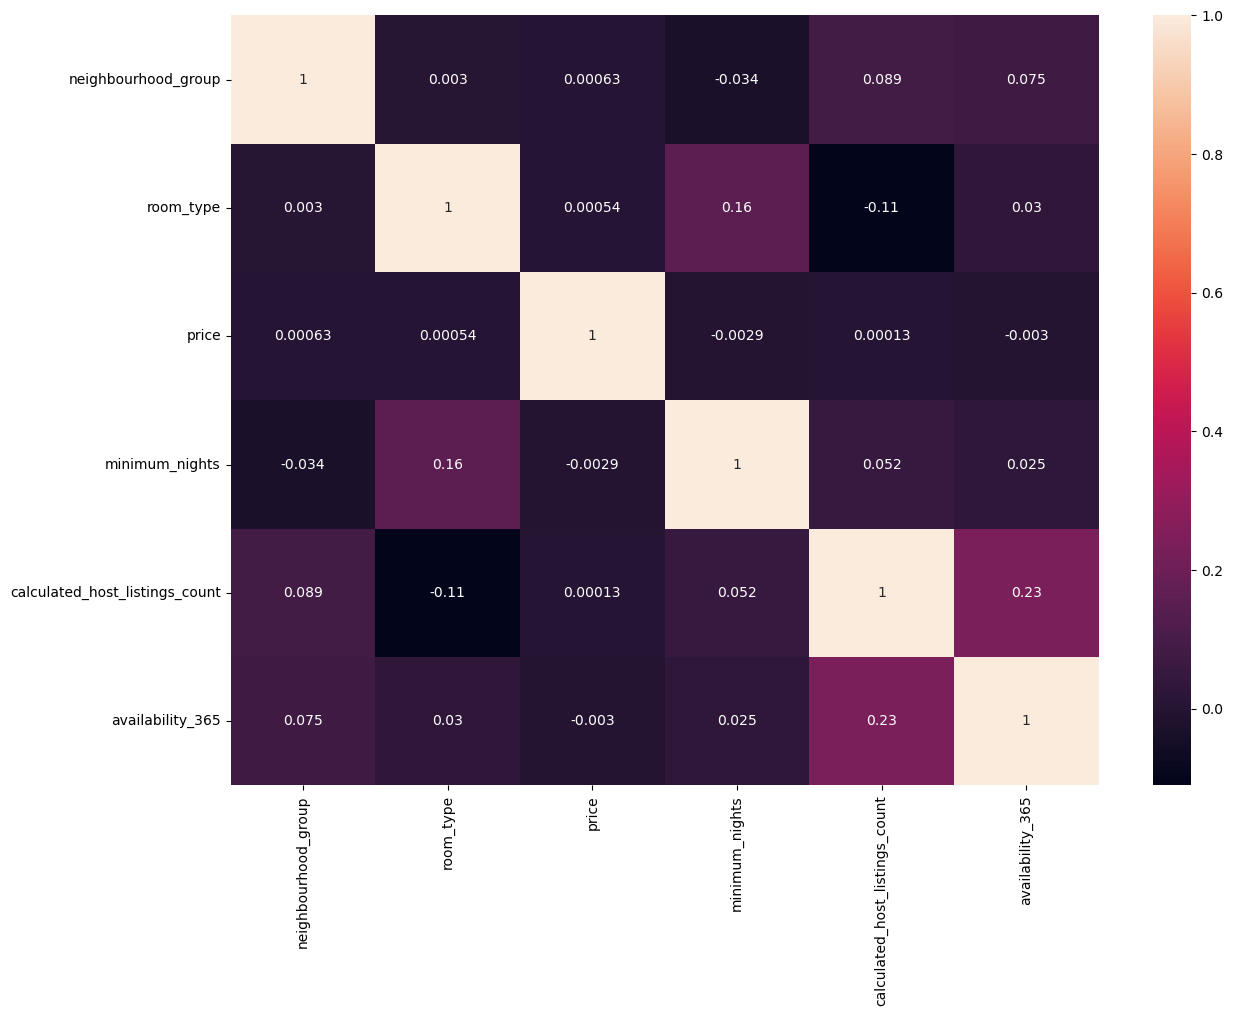

In [50]:
corr = df_reg_encode.corr(method='kendall')
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True)
df_reg_encode.columns

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [52]:
#independent variables and dependent variables
x = df_reg_encode[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]
y = df_reg_encode['price']

#Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=456, shuffle = False)
x_train.head()
y_train.head()

0     966
1     142
4     204
5     577
7    1060
Name: price, dtype: int32

In [53]:
x_train.shape

(66315, 6)

In [54]:
y_train.shape

(66315,)

In [55]:
#Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

r2_score(y_test,y_pred)

1.0

In [56]:
#Decision Tree Regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.01,random_state=123)
                                               
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

r2_score(y_test,y_predict)

1.0

**It is very import to note that an r2_score value of 1 is extremely rare in practice and may be a sign of overfitting, which occurs when the model is too complex and is able to fit the noise in the data rather than the underlying patterns. Therefore, it is important to evaluate the model using other metrics and techniques, such as cross-validation, to ensure that it is not overfitting.**